In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import pickle
from pathlib import Path

hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

paramspath = os.path.join(path, 'compare_linfit_params')

pathrawdata = os.path.join(path, 'current_data')
pathlist = os.path.join(pathrawdata, 'lists')

In [3]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']
areas_sel_noLGd = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']

In [4]:
df_int_all_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_all_targets.csv'))
df_slope_all_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_all_targets.csv'))
df_int_all_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_all_targets_lin.csv'))
df_slope_all_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_all_targets_lin.csv'))

In [5]:
df_int_V1_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_targets_V1.csv'))
df_slope_V1_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_targets_V1.csv'))
df_int_V1_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_targets_V1_lin.csv'))
df_slope_V1_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_targets_V1_lin.csv'))

In [6]:
df_int_PM_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_targets_PM.csv'))
df_slope_PM_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_targets_PM.csv'))
df_int_PM_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_targets_PM_lin.csv'))
df_slope_PM_lin_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_slope_targets_PM_lin.csv'))

In [7]:
df_int_all_boot = df_int_all_boot[areas_sel_noLGd]
df_slope_all_boot = df_slope_all_boot[areas_sel_noLGd]

In [8]:
df_int_all_boot = df_int_all_boot[areas_sel_noLGd]
df_slope_all_boot = df_slope_all_boot[areas_sel_noLGd]

In [9]:
df_int_all_boot = df_int_all_boot.apply(lambda x: 10**x)
df_slope_all_boot = df_slope_all_boot.apply(lambda x: 10**x)

In [10]:
df_int_V1_boot = df_int_V1_boot[areas_sel_noLGd]
df_slope_V1_boot = df_slope_V1_boot[areas_sel_noLGd]
df_int_PM_boot = df_int_PM_boot[areas_sel_noLGd]
df_slope_PM_boot = df_slope_PM_boot[areas_sel_noLGd]


In [11]:
# df_int_PM_lin_boot = df_int_PM_lin_boot.apply(lambda x:np.log10(x))
# df_int_V1_lin_boot = df_int_V1_lin_boot.apply(lambda x:np.log10(x))

In [12]:
# df_int_PM_log = pd.concat([df_int_PM_boot, df_int_PM_lin_boot], axis = 1)
# df_int_V1_log = pd.concat([df_int_V1_boot, df_int_V1_lin_boot], axis = 1)

In [13]:

df_int_V1_boot = df_int_V1_boot.apply(lambda x: 10**x)
df_slope_V1_boot = df_slope_V1_boot.apply(lambda x: 10**x)

df_int_PM_boot = df_int_PM_boot.apply(lambda x: 10**x)
df_slope_PM_boot = df_slope_PM_boot.apply(lambda x: 10**x)

In [14]:
df_int_all_boot = pd.concat([df_int_all_boot, df_int_all_lin_boot[['LGd']]], axis = 1)
df_slope_all_boot = pd.concat([df_slope_all_boot, df_slope_all_lin_boot[['LGd']]], axis = 1)

In [15]:
df_int_V1_boot = pd.concat([df_int_V1_boot, df_int_V1_lin_boot[['LGd']]], axis = 1)
df_slope_V1_boot = pd.concat([df_slope_V1_boot, df_slope_V1_lin_boot[['LGd']]], axis = 1)

df_int_PM_boot = pd.concat([df_int_PM_boot, df_int_PM_lin_boot[['LGd']]], axis = 1)
df_slope_PM_boot = pd.concat([df_slope_PM_boot, df_slope_PM_lin_boot[['LGd']]], axis = 1)

In [16]:
int_pars = []
slope_pars = []
int_pars_V1 = []
int_pars_PM = []
for area in areas_sel:
    int_pars.append({'area':area, 'mean':df_int_all_boot[area].mean(), 'CI95_low': df_int_all_boot[area].quantile(0.025), 'CI95_high': df_int_all_boot[area].quantile(0.975), 'sd' : df_int_all_boot[area].std()})
    int_pars_V1.append({'area':area, 'mean':df_int_V1_boot[area].mean(), 'CI95_low': df_int_V1_boot[area].quantile(0.025), 'CI95_high': df_int_V1_boot[area].quantile(0.975), 'sd' : df_int_V1_boot[area].std()})
    int_pars_PM.append({'area':area, 'mean':df_int_PM_boot[area].mean(), 'CI95_low': df_int_PM_boot[area].quantile(0.025), 'CI95_high': df_int_PM_boot[area].quantile(0.975), 'sd' : df_int_PM_boot[area].std()})

    
    slope_pars.append({'area':area, 'mean':df_slope_all_boot[area].mean(), 'CI95_low': df_slope_all_boot[area].quantile(0.025), 'CI95_high': df_slope_all_boot[area].quantile(0.975)})


In [17]:
int_pars_df = pd.DataFrame(int_pars)
int_pars_V1_df = pd.DataFrame(int_pars_V1)
int_pars_PM_df = pd.DataFrame(int_pars_PM)
slope_pars_df = pd.DataFrame(slope_pars)

In [18]:
int_pars_df['errm']=int_pars_df['mean']-int_pars_df['CI95_low']
int_pars_V1_df['errm']=int_pars_V1_df['mean']-int_pars_V1_df['CI95_low']
int_pars_PM_df['errm']=int_pars_PM_df['mean']-int_pars_PM_df['CI95_low']
int_pars_df['errp']=int_pars_df['CI95_high']-int_pars_df['mean']
int_pars_V1_df['errp']=int_pars_V1_df['CI95_high']-int_pars_V1_df['mean']
int_pars_PM_df['errp']=int_pars_PM_df['CI95_high']-int_pars_PM_df['mean']

In [19]:
slope_pars_df['errm']=slope_pars_df['mean']-slope_pars_df['CI95_low']
slope_pars_df['errp']=slope_pars_df['CI95_high']-slope_pars_df['mean']

<ErrorbarContainer object of 3 artists>

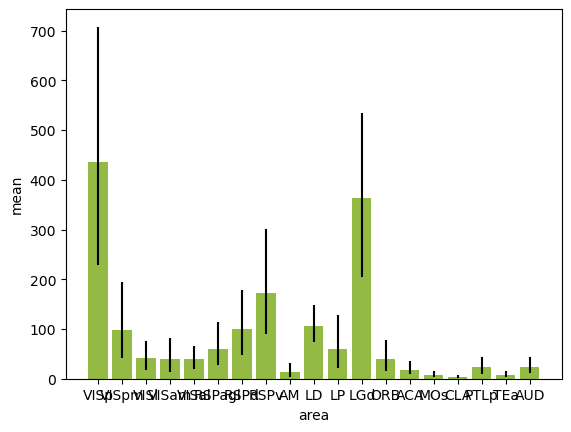

In [20]:
sns.barplot(data = int_pars_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_df.shape[0]), y = int_pars_df['mean'].values, yerr = [int_pars_df['errm'].values,int_pars_df['errp'].values], c= 'k',fmt='none')


<ErrorbarContainer object of 3 artists>

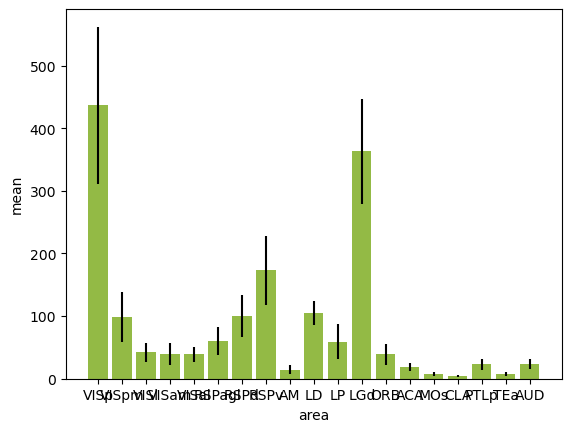

In [21]:
sns.barplot(data = int_pars_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_df.shape[0]), y = int_pars_df['mean'].values, yerr = [int_pars_df['sd'],int_pars_df['sd']], c= 'k',fmt='none')


In [22]:
int_pars_V1_df

,area,mean,CI95_low,CI95_high,sd,errm,errp
0,VISp,486.894368,222.167727,822.761901,154.734368,264.726642,335.867533
1,VISpm,82.781198,34.821567,171.415234,34.980607,47.959631,88.634036
2,VISl,27.097318,7.055648,68.797199,16.008912,20.041669,41.699882
3,VISam,29.659056,6.516651,86.479715,21.589120,23.142405,56.820658
4,VISal,32.319172,12.065883,70.946940,15.311928,20.253289,38.627767
5,RSPagl,58.265289,22.106806,127.603130,27.166471,36.158483,69.337841
6,RSPd,108.322683,44.173547,233.258664,50.060541,64.149136,124.935981
7,RSPv,187.658978,81.396256,370.673784,76.337292,106.262722,183.014806
8,AM,10.269441,1.626721,31.440308,8.191385,8.642720,21.170867
9,LD,120.664695,79.749977,191.699985,28.446789,40.914719,71.035289


<ErrorbarContainer object of 3 artists>

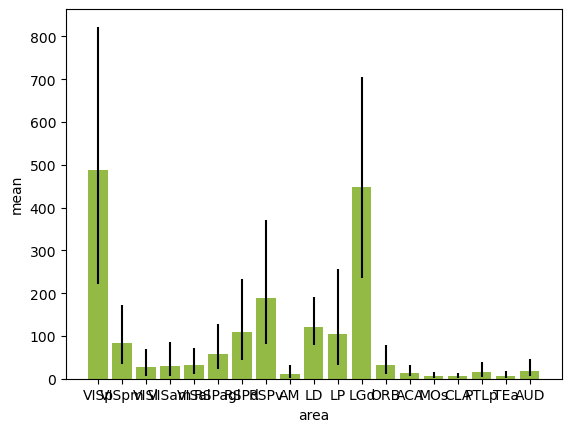

In [23]:
sns.barplot(data = int_pars_V1_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_V1_df.shape[0]), y = int_pars_V1_df['mean'].values, yerr = [int_pars_V1_df['errm'].values,int_pars_V1_df['errp'].values], c= 'k',fmt='none')


<ErrorbarContainer object of 3 artists>

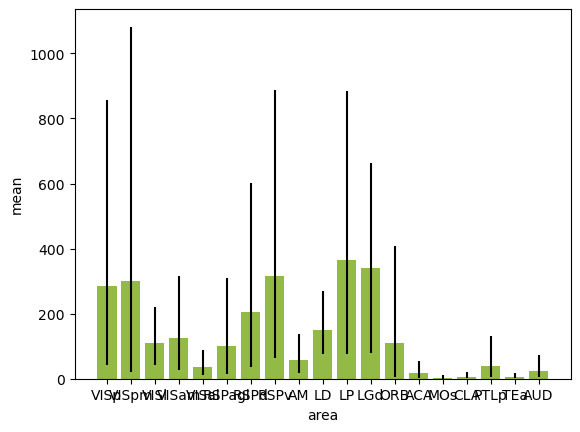

In [24]:
sns.barplot(data = int_pars_PM_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_PM_df.shape[0]), y = int_pars_PM_df['mean'].values, yerr = [int_pars_PM_df['errm'].values,int_pars_PM_df['errp'].values], c= 'k',fmt='none')


<ErrorbarContainer object of 3 artists>

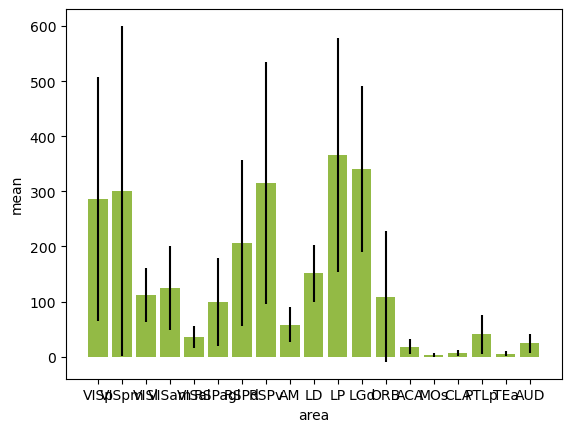

In [25]:
sns.barplot(data = int_pars_PM_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_PM_df.shape[0]), y = int_pars_PM_df['mean'].values, yerr = [int_pars_PM_df['sd'].values,int_pars_PM_df['sd'].values], c= 'k',fmt='none')
